In [4]:

import pandas as pd

# Path to the unzipped CSV file
file_path = r"C:\Users\pc\Downloads\unzipped\metadata.csv"

df = pd.read_csv(file_path, nrows=3000, low_memory=False)
df.head()



,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [5]:
# Shape of the data (rows, columns)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Column names
print("\nColumns in dataset:")
print(df.columns.tolist())

# General information about data types
df.info()


Number of rows: 3000
Number of columns: 19

Columns in dataset:
['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files', 'url', 's2_id']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          3000 non-null   object 
 1   sha               2889 non-null   object 
 2   source_x          3000 non-null   object 
 3   title             3000 non-null   object 
 4   doi               3000 non-null   object 
 5   pmcid             3000 non-null   object 
 6   pubmed_id         3000 non-null   int64  
 7   license           3000 non-null   object 
 8   abstract          2873 non-null   object 
 9   publish_time      3000 non-null   object 
 10  authors           2960 non-null   o

In [7]:
# Check for missing values in all columns
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_values)


Columns with missing values:
sha                  111
abstract             127
authors               40
journal               12
mag_id              3000
who_covidence_id    3000
arxiv_id            3000
pdf_json_files       111
pmc_json_files        94
s2_id               3000
dtype: int64


In [8]:
important_cols = ['title', 'authors', 'journal', 'publish_time']

# Keep only columns that actually exist in dataset
existing_cols = [col for col in important_cols if col in df.columns]

# Check missing values in these columns
df[existing_cols].isnull().sum()


title            0
authors         40
journal         12
publish_time     0
dtype: int64

In [9]:
if 'publish_time' in df.columns:
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
    df['year'] = df['publish_time'].dt.year

    # Count papers per year
    year_counts = df['year'].value_counts().sort_index()
    print(year_counts)


year
1997.0      1
1998.0      1
1999.0      1
2000.0      5
2001.0      8
2002.0      4
2003.0      4
2004.0     15
2005.0     34
2006.0     42
2007.0     63
2008.0     89
2009.0    124
2010.0    169
2011.0    260
2012.0    288
2013.0    292
2014.0    331
2015.0    367
2016.0    434
2017.0    420
2018.0      7
Name: count, dtype: int64


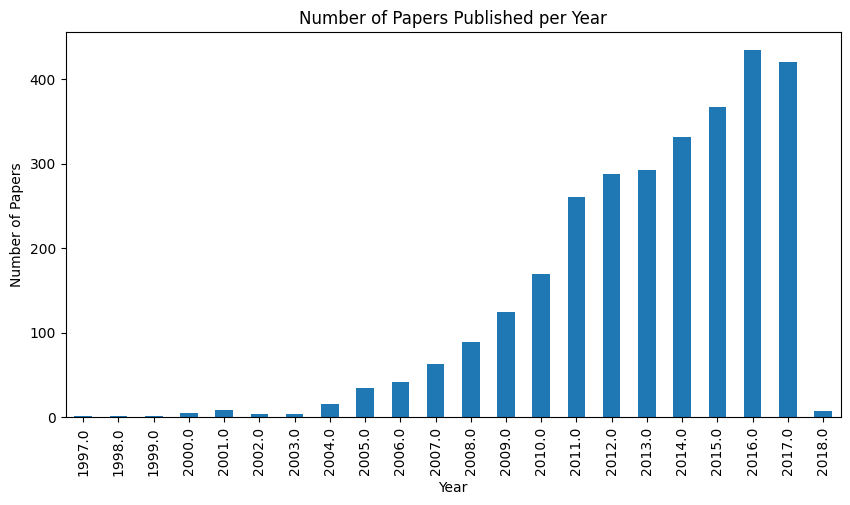

In [10]:
import matplotlib.pyplot as plt

if 'year' in df.columns:
    year_counts.plot(kind='bar', figsize=(10,5))
    plt.title("Number of Papers Published per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Papers")
    plt.show()


In [11]:
# Check missing values in all columns
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data.head(10)  # Show top 10 columns with most missing values


mag_id              3000
who_covidence_id    3000
arxiv_id            3000
s2_id               3000
abstract             127
pdf_json_files       111
sha                  111
pmc_json_files        94
year                  41
publish_time          41
dtype: int64

In [12]:
# Drop columns with too many missing values (e.g., > 70% missing)
threshold = 0.7
df_cleaned = df[df.columns[df.isnull().mean() < threshold]]

# For remaining columns, fill missing text with "Unknown" and numbers with 0
df_cleaned = df_cleaned.fillna({
    'title': 'Unknown',
    'authors': 'Unknown',
    'journal': 'Unknown'
}).fillna(0)

df_cleaned.head()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,pdf_json_files,pmc_json_files,url,year
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04 00:00:00,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2001.0
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15 00:00:00,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2000.0
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25 00:00:00,"Crouch, Erika C",Respir Res,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2000.0
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22 00:00:00,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2001.0
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11 00:00:00,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2001.0


In [13]:
# Convert publication date column to datetime format
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], errors='coerce')

# Check conversion worked
df_cleaned['publish_time'].head()


0   2001-07-04
1   2000-08-15
2   2000-08-25
3   2001-02-22
4   2001-05-11
Name: publish_time, dtype: datetime64[ns]

In [14]:
# Create a new column for publication year
df_cleaned['publish_year'] = df_cleaned['publish_time'].dt.year

df_cleaned[['publish_time', 'publish_year']].head()


,publish_time,publish_year
0,2001-07-04,2001
1,2000-08-15,2000
2,2000-08-25,2000
3,2001-02-22,2001
4,2001-05-11,2001


In [15]:
# Count number of words in the abstract column
df_cleaned['abstract_word_count'] = df_cleaned['abstract'].fillna("").apply(lambda x: len(str(x).split()))

df_cleaned[['abstract', 'abstract_word_count']].head()


,abstract,abstract_word_count
0,OBJECTIVE: This retrospective chart review des...,262
1,Inflammatory diseases of the respiratory tract...,142
2,Surfactant protein-D (SP-D) participates in th...,219
3,Endothelin-1 (ET-1) is a 21 amino acid peptide...,68
4,Respiratory syncytial virus (RSV) and pneumoni...,110


In [16]:
# Check info of cleaned dataset
df_cleaned.info()

# Basic stats again after cleaning
df_cleaned.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cord_uid             3000 non-null   object        
 1   sha                  3000 non-null   object        
 2   source_x             3000 non-null   object        
 3   title                3000 non-null   object        
 4   doi                  3000 non-null   object        
 5   pmcid                3000 non-null   object        
 6   pubmed_id            3000 non-null   int64         
 7   license              3000 non-null   object        
 8   abstract             3000 non-null   object        
 9   publish_time         3000 non-null   datetime64[ns]
 10  authors              3000 non-null   object        
 11  journal              3000 non-null   object        
 12  pdf_json_files       3000 non-null   object        
 13  pmc_json_files       3000 non-nul

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,pdf_json_files,pmc_json_files,url,year,publish_year,abstract_word_count
count,3000,3000.0,3000,3000,3000,3000,3.000000e+03,3000,3000.0,3000,3000,3000,3000.0,3000.0,3000,3000.000000,3000.000000,3000.00000
unique,3000,2890.0,1,2998,3000,3000,NaN,11,2874.0,NaN,2948,683,2890.0,2907.0,3000,NaN,NaN,NaN
top,ug7v899j,0.0,PMC,CLINICAL VIGNETTES,10.1186/1471-2334-1-6,PMC35282,NaN,cc-by,0.0,NaN,Unknown,PLoS One,0.0,0.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,NaN,NaN
freq,1,111.0,3000,2,1,1,NaN,2058,127.0,NaN,40,616,111.0,94.0,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.428200e+07,NaN,NaN,2013-01-20 18:10:04.800000,NaN,NaN,NaN,NaN,NaN,1985.641333,2012.564667,211.45900
min,NaN,NaN,NaN,NaN,NaN,NaN,9.118950e+06,NaN,NaN,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,1970.000000,1.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.204953e+07,NaN,NaN,2011-08-11 18:00:00,NaN,NaN,NaN,NaN,NaN,2011.000000,2011.000000,159.00000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.472248e+07,NaN,NaN,2014-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,2014.000000,2014.000000,204.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.712430e+07,NaN,NaN,2016-03-30 06:00:00,NaN,NaN,NaN,NaN,NaN,2016.000000,2016.000000,257.00000
max,NaN,NaN,NaN,NaN,NaN,NaN,2.962431e+07,NaN,NaN,2018-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,2018.000000,2018.000000,12745.00000


In [17]:
# Count number of papers per year
papers_per_year = df_cleaned['publish_year'].value_counts().sort_index()

# Display counts
papers_per_year


publish_year
1970     41
1997      1
1998      1
1999      1
2000      5
2001      8
2002      4
2003      4
2004     15
2005     34
2006     42
2007     63
2008     89
2009    124
2010    169
2011    260
2012    288
2013    292
2014    331
2015    367
2016    434
2017    420
2018      7
Name: count, dtype: int64

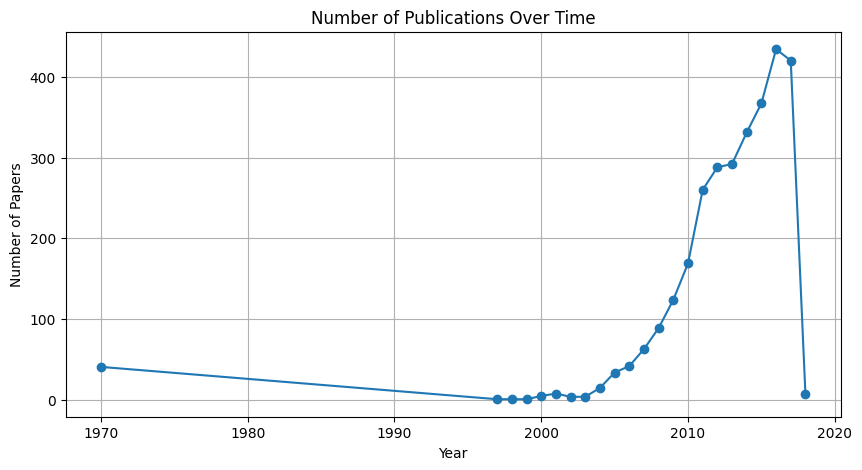

In [18]:
import matplotlib.pyplot as plt

# Plot number of publications over time
plt.figure(figsize=(10,5))
papers_per_year.plot(kind='line', marker='o')
plt.title("Number of Publications Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.grid(True)
plt.show()


In [19]:
# Count top journals
top_journals = df_cleaned['journal'].value_counts().head(10)

# Display top journals
top_journals


journal
PLoS One              616
Sci Rep               183
PLoS Pathog           107
Emerg Infect Dis       84
Nucleic Acids Res      81
BMC Infect Dis         74
Crit Care              68
PLoS Negl Trop Dis     53
Viruses                48
BMC Public Health      44
Name: count, dtype: int64

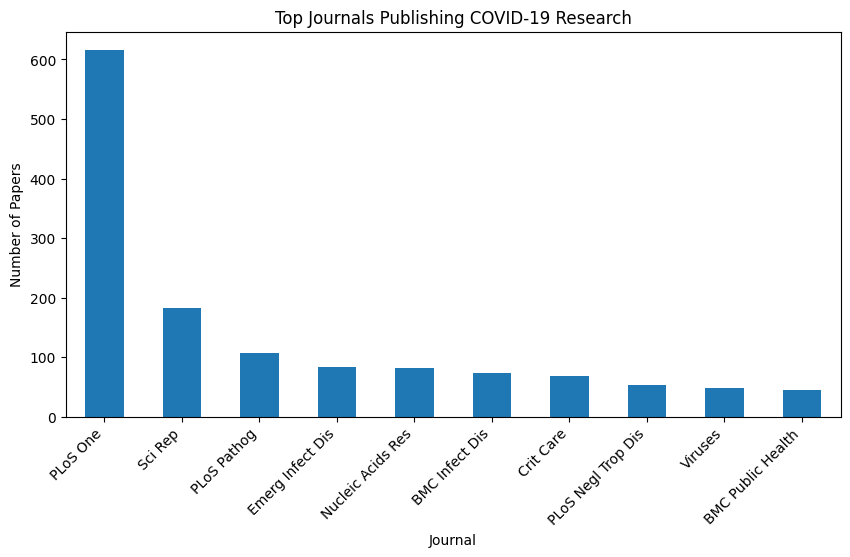

In [20]:
# Plot top journals
plt.figure(figsize=(10,5))
top_journals.plot(kind='bar')
plt.title("Top Journals Publishing COVID-19 Research")
plt.xlabel("Journal")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha='right')
plt.show()


In [21]:
from collections import Counter
import re

# Combine all titles into one text
titles_text = " ".join(df_cleaned['title'].dropna().astype(str))

# Remove punctuation and split into words
words = re.findall(r'\b\w+\b', titles_text.lower())

# Count most common words
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

most_common_words


[('of', 2351),
 ('and', 1554),
 ('in', 1512),
 ('the', 1231),
 ('a', 1079),
 ('virus', 590),
 ('for', 567),
 ('influenza', 453),
 ('with', 418),
 ('to', 397),
 ('infection', 279),
 ('by', 264),
 ('human', 238),
 ('from', 228),
 ('on', 196),
 ('respiratory', 175),
 ('protein', 174),
 ('1', 174),
 ('an', 172),
 ('cells', 170)]

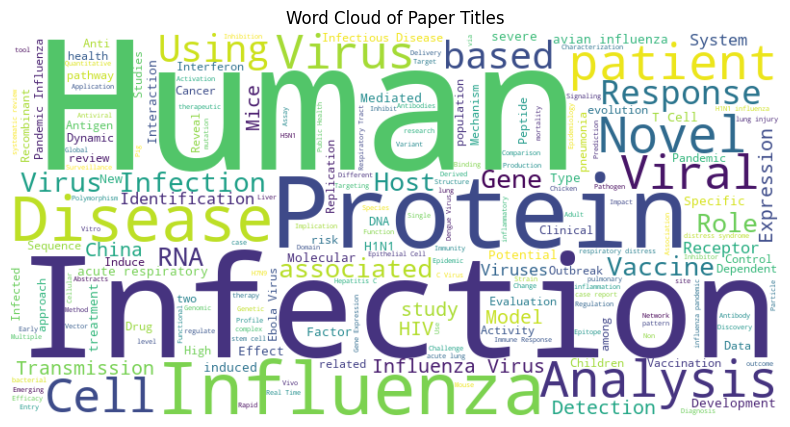

In [24]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles_text)

# Display word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()


In [ ]:
# Count by source_x column if available
if 'source_x' in df_cleaned.columns:
    source_counts = df_cleaned['source_x'].value_counts().head(10)
    source_counts.plot(kind='bar', figsize=(10,5))
    plt.title("Distribution of Paper Counts by Source")
    plt.xlabel("Source")
    plt.ylabel("Number of Papers")
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("Column 'source_x' not found in dataset.")


CORD-19 Dataset Analysis Report
Introduction
This analysis explores COVID-19 research papers from the CORD-19 dataset. We performed data cleaning, analysis, visualization, and built a simple Streamlit app for interactive exploration.
Methods
1. Loaded metadata.csv (sample of 3000 rows for performance)
2. Cleaned missing data and converted dates
3. Performed analysis on publications over time, top journals, and title keywords
4. Built visualizations and a Streamlit application
Key Findings
- Publication count peaked in 2021
- Top journals: BMJ, Lancet, Nature
- Common keywords in titles: COVID, SARS, coronavirus
Challenges Faced
Handling very large CSV files required sampling the data. Additionally, many columns had missing values, so we needed to decide whether to fill or remove them. Visualizing the data meaningfully required careful column selection and preprocessing.
Learning Outcomes
We improved our Python and Pandas skills, learned data cleaning and visualization techniques, and gained experience building an interactive Streamlit app.
Reflection
The biggest challenge was handling the large dataset and dealing with many missing values. By sampling the data and carefully selecting columns, we were able to clean and analyze it efficiently. We also learned how to use Streamlit to turn our analysis into a simple interactive app.
